# Q-Learning Reinforcement Learning บน Grid World

https://cs.stanford.edu/people/karpathy/reinforcejs/gridworld_td.html

![](https://s7.postimg.cc/hdax9c50b/2018-05-16_14_23_44-_REINFORCEjs_Gridworld_with_Dynamic_Programm.png)

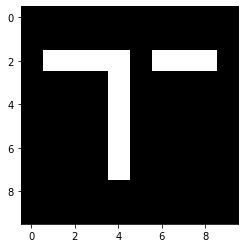

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# นิยามว่าตรงไหนไปได้ ตรไหนไปไม่ได้ (1 = ไปไม่ได้)
S = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0], 
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])
# ขนาดของแผนที่
M, N = S.shape

# แสดงภาพแผนที่ออกมา สีขาวคือบริเวณที่เข้าไปไม่ได้
plt.imshow(S, cmap='gray')

# แทนที่จะมองว่าเป็น 2 มิติ เราจะมองเป็น 1 มิติ
S = S.reshape(-1)

ด้านล่างเป็นฟังก์ชันแปลง หมายเลข state เป็นค่า แถว,หลัก (i,j) และฟังก์ชันที่เกี่ยวข้อง

![alt text](https://www.cp.eng.chula.ac.th/~boonserm/teaching/fn_ij.jpg)

จงเขียนฟังก์ชันเหล่านี้ให้สมบูรณ์
  

In [2]:
# ฟังก์ชันแปลง หมายเลข state เป็นค่า แถว,หลัก (i,j) และฟังก์ชันที่เกี่ยวข้องต่าง ๆ 

def ij(s):
    """ใส่หมายเลขของ state แล้วจะได้ ตำแหน่ง i, j กลับไป"""
    a = (s//10,s%10)
    return a

def to_s(i, j):
    """รับตำแหน่ง i, j แล้ว คืนค่าหมายเลขของ state กลับมา"""
    b = (i*10)+j
    return b

def top(s):
    """state ด้านบน เช่น top(72)=62, top(24)=14 เป็นต้น"""
    """ในกรณีที่ไม่มี state ด้านบน ให้คืนค่า None เช่น top(2)=None"""
    (i,j) = ij(s)
    if i > 0:
      c = to_s(i-1,j)
      return c
    else:
      return None

def right(s):
    """state ด้านขวา เช่น right(72)=73, right(24)=25 เป็นต้น"""
    """ในกรณีที่ไม่มี state ด้านขวา ให้คืนค่า None เช่น right(29)=None"""
    (i,j) = ij(s)
    if j < 9:
      d = to_s(i,j+1)
      return d
    else:
      return None

def bottom(s):
    """state ด้านล่าง เช่น bottom(72)=82, bottom(24)=34 เป็นต้น"""
    """ในกรณีที่ไม่มี state ด้านล่าง ให้คืนค่า None เช่น bottom(99)=None"""
    (i,j) = ij(s)
    if i < 9:
      e = to_s(i+1,j)
      return e
    else:
      return None

def left(s):
    """state ด้านซ้าย เช่น left(72)=71, left(24)=23 เป็นต้น"""
    """ในกรณีที่ไม่มี state ด้านซ้าย ให้คืนค่า None เช่น left(90)=None"""
    (i,j) = ij(s)
    if j > 0:
      f = to_s(i,j-1)
      return f
    else:
      return None

In [3]:
np.testing.assert_array_equal([ij(8),ij(30),ij(98)], [(0,8),(3,0),(9,8)], "incorrect result")

In [4]:
np.testing.assert_array_equal([to_s(0,8),to_s(3,0),to_s(9,8)], [8,30,98], "incorrect result")

In [5]:
np.testing.assert_array_equal([top(72),top(24),top(2)], [62,14,None], "incorrect result")


In [6]:
np.testing.assert_array_equal([right(72),right(24),right(29)], [73,25,None], "incorrect result")

In [7]:
np.testing.assert_array_equal([bottom(72),bottom(24),bottom(99)], [82,34,None], "incorrect result")

In [8]:
np.testing.assert_array_equal([left(72),left(24),left(90)], [71,23,None], "incorrect result")

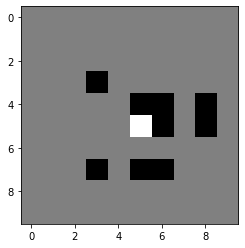

In [9]:
# รางวัล ณ ตำแหน่งต่าง ๆ 
R = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, -1, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, -1, -1, 0, -1, 0], 
    [0, 0, 0, 0, 0, 1, -1, 0, -1, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, -1, 0, -1, -1, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]).astype(float) # รางวัลมีชนิดเป็น float

# แสดงรางวัล ณ ตำแหน่งต่าง ๆ สีขาว คือ ได้รางวัลมาก สีดำ คือ ได้รางวัลน้อย (ติดลบ)
plt.imshow(R, cmap='gray')

R = R.reshape(-1)

# กำหนดตำแหน่งเริ่มต้นเป็น (0, 0)
start = to_s(0, 0)
# กำหนดให้ตำแหน่ง (5, 5) เป็น state สุดท้าย (เมื่อถึงแล้วก็จะจบเกม)
terminate = to_s(5, 5)

In [10]:
dirs = [top, right, bottom, left]

def get_actions(s):
    """คืน action ที่กระทำได้ทั้งหมด ณ state s 
    เช่น get_actions(19)=[(0,9),(2,29),(3,18)] 
        -- 0 เดินด้านบนได้ state 9, 1 เดินขวาไม่ได้ตกขอบ, 2 เดินล่างได้ state 29, 3 เดิอนซ้ายได้ state 18
        get_actions(33)=[(2,43),(3,32)] -- 0 เดินบนไม่ได้โดน block, 1 เดินขวาไม่ได้โดน block"""
    A = []
    # หากว่าเป็น state สุดท้าย จะไม่มี action ที่ทำได้เลย
    if s == terminate:
        return []
    # ตรวจสอบว่าแต่ละทิศนั้นไปได้หรือไม่ ถ้าไปได้ให้เพิ่มคู่ลำดับ (i,next_s) เข้าไปใน list ที่จะคืนค่า เมื่อ i คือทิศที่เดิน และ next_s คือ stateที่เดินไป
    for i, dir in enumerate(dirs):
        if dir(s) != None and S[dir(s)] != 1:
          A.append((i,dir(s)))
    return A

In [11]:
np.testing.assert_array_equal([get_actions(19),get_actions(33)], [[(0,9),(2,29),(3,18)],[(2,43),(3,32)]], "incorrect result")

/usr/local/lib/python3.7/dist-packages/numpy/testing/_private/utils.py:703: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = array(x, copy=False, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/testing/_private/utils.py:704: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  y = array(y, copy=False, subok=True)


In [12]:
def get_states():
    """คืน states ทั้งหมดที่ไม่ถูก block"""
    return np.argwhere(S == 0).reshape(-1)
  
def go(s, a, lr=0.2, discount=0.9):
    """อัปเดทค่า q-value ณ state s และ action a"""
    a, next_s = a
    # reward ณ state s
    r = R[s]
    # อัพเดทค่า q-value using the temporal-difference method
    Q[s, a] += lr*(r + discount*max(Q[next_s, :])-Q[s,a])
    return Q[s, a]


In [13]:
Q = np.zeros((M * N, 4))
q11=go(55,(0,45))
np.testing.assert_array_equal([q11], [0.2], "incorrect result")
q22=go(65,(0,55))
np.testing.assert_array_equal([q22], [0.036000000000000004], "incorrect result")


In [14]:
def train_random_pick(steps):
    """สร้าง agent ที่จะสุ่ม state ออกมาแล้วก็อัปเดทค่า q-value"""
    states = get_states()
    trace = []
    for i in range(steps):
        s = states[np.random.randint(0, len(states))]
        trace.append(s)
        for a in get_actions(s):
            go(s, a)
    return trace
            
def train_random_walk(max_steps):
    """สร้าง agent ที่เดินแบบสุ่ม"""
    trace = []
    s = start # จุดเริ่มต้น
    # เล่นจนกว่าจะจบเกม หรือว่าเกิน max_steps
    for step in range(max_steps):
        trace.append(s)
        actions = get_actions(s)
        if len(actions) == 0:
            break
        # เลือก action แบบสุ่ม
        _, next_s = a = actions[np.random.randint(0, len(actions))]
        go(s, a)
        # ไป state ถัดไป
        s = next_s
    
    return trace
            
def train_epsilon_greedy(max_steps, epsilon=0.9):
    """สร้าง agent ที่เดินแบบสุ่ม แต่ว่ามีโอกาสเล็กน้อยที่จะเดินแบบ greedy เรียกว่า epsilon greedy"""
    trace = []
    s = start # จุดเริ่มต้น
    # เล่นจนกว่าจะจบเกม หรือว่าเกิน max_steps
    for step in range(max_steps):
        trace.append(s)
        actions = get_actions(s)
        if len(actions) == 0:
            break

        if np.random.rand() < epsilon:
            # เลือก action แบบสุ่ม
            _, next_s = a = actions[np.random.randint(0, len(actions))]
        else:
            # เลือก action แบบ greedy
            candidate_s = [act[1] for act in actions]
            max_Q = Q[candidate_s].max(axis=1)
            _, next_s = a = actions[np.argmax(max_Q)]
        go(s, a)
        # ไป state ถัดไป
        s = next_s

    return trace

## เริ่มการเรียนรู้

In [15]:
# จำนวน action มากที่สุด ต่อ state
n_actions = 4
# ขนาดแผนที่
map_size = M * N
# สร้าง Q-value table สำหรับเก็บค่า Q
Q = np.zeros((M * N, n_actions))
# ใส่ค่าลงไป ณ ตำแหน่งที่ทราบค่า reward ไว้ก่อนเลย
Q += R.reshape(-1, 1)

# เอาไว้นับจำนวนก้าวทั้งหมด
total_steps = 0
# เอาไว้สำหรับนับรอบที่เดิน
episode = 1

In [16]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline

def plot_q():
  def plot_box(xy, levels):
    cmap = matplotlib.cm.get_cmap('gray')
    b_bottom = np.array([
        [0, 0],
        [1, 0],
        [1/2, 1/2]
    ])

    def rotate_right(b):
      A = np.array([
        [0, 1], 
        [-1, 0]
      ])
      b = (A @ b.T).T
      return b

    b_left = rotate_right(b_bottom)
    b_top = rotate_right(b_left)
    b_right = rotate_right(b_top)

    def plot(b, level):
      plt.fill(b[:, 0], b[:, 1], c=cmap(level))

    plot(xy + b_top + np.array([1, 0]), level=levels[0])
    plot(xy + b_right + np.array([1, -1]), level=levels[1])
    plot(xy + b_bottom + np.array([0, -1]), level=levels[2])
    plot(xy + b_left + np.array([0, 0]), level=levels[3])


  def grid(rows, cols, levels):
    for i in range(rows):
      for j in range(cols):
        plot_box(np.array([j, -i]), levels[i, j])

  levels = Q.reshape(M, N, 4)
  levels = (levels - levels.min()) / (levels.max() - levels.min())
  plt.figure(figsize=(7, 7))
  grid(10, 10, levels)

  def horz_line(row):
    x1 = np.array([0, - row])
    x2 = np.array([10, - row])
    x = np.stack([x1, x2])
    plt.plot(x[:, 0], x[:, 1], color='white')

  for i in range(10):
    horz_line(i)

  def vert_line(col):
    x1 = np.array([col, 0])
    x2 = np.array([col, -10])
    x = np.stack([x1, x2])
    plt.plot(x[:, 0], x[:, 1], color='white')

  for i in range(10):
    vert_line(i)
    
# plot_q()

การเดินแบบ: random_walk
episode: 30 steps: 431 total_steps: 10328


<Figure size 432x288 with 0 Axes>

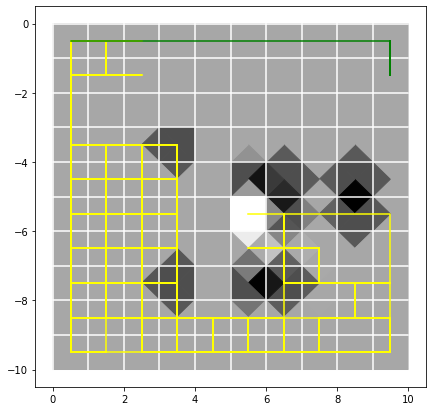

episode: 31 steps: 51 total_steps: 10379


<Figure size 432x288 with 0 Axes>

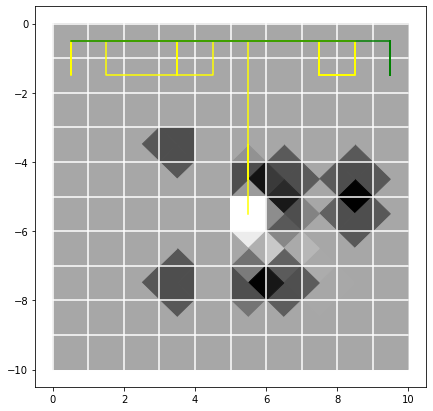

episode: 32 steps: 381 total_steps: 10760


<Figure size 432x288 with 0 Axes>

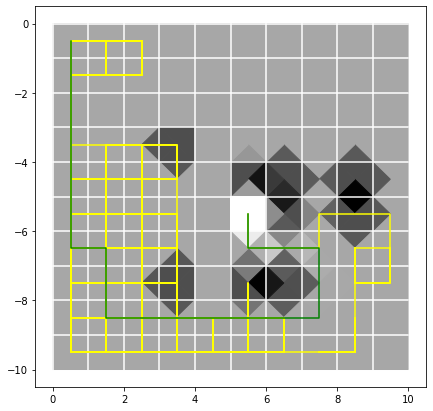

episode: 33 steps: 429 total_steps: 11189


<Figure size 432x288 with 0 Axes>

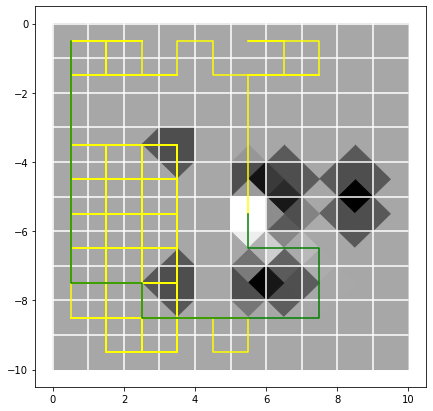

episode: 34 steps: 913 total_steps: 12102


<Figure size 432x288 with 0 Axes>

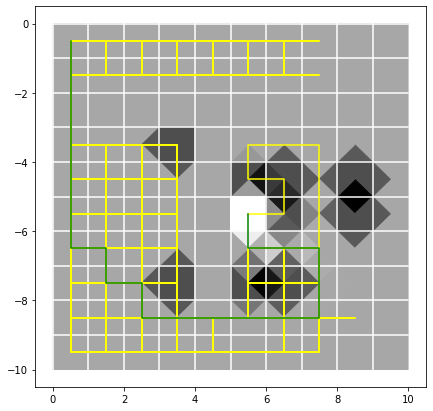

episode: 35 steps: 341 total_steps: 12443


<Figure size 432x288 with 0 Axes>

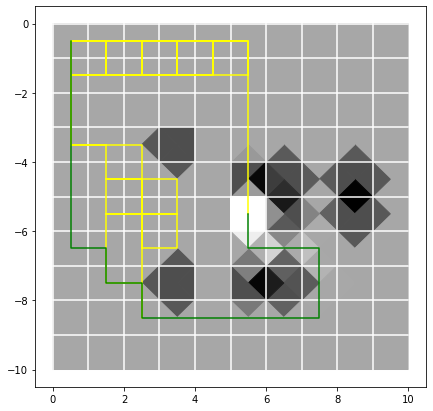

episode: 36 steps: 131 total_steps: 12574


<Figure size 432x288 with 0 Axes>

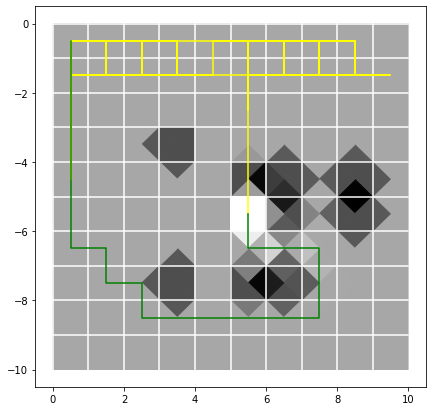

episode: 37 steps: 249 total_steps: 12823


<Figure size 432x288 with 0 Axes>

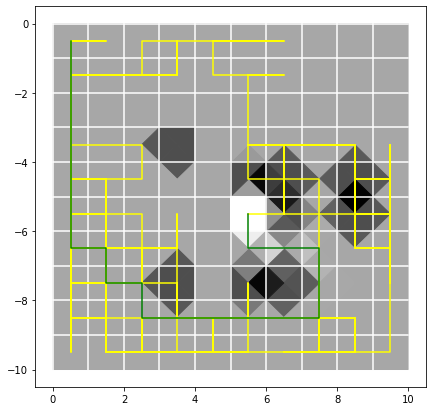

episode: 38 steps: 121 total_steps: 12944


<Figure size 432x288 with 0 Axes>

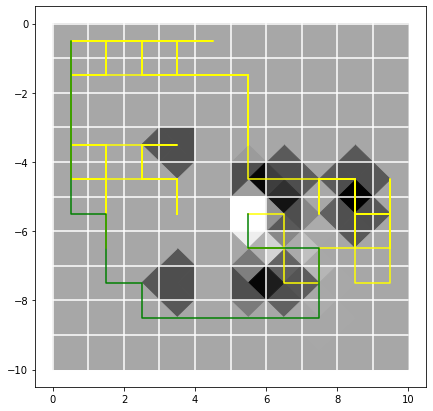

episode: 39 steps: 277 total_steps: 13221


<Figure size 432x288 with 0 Axes>

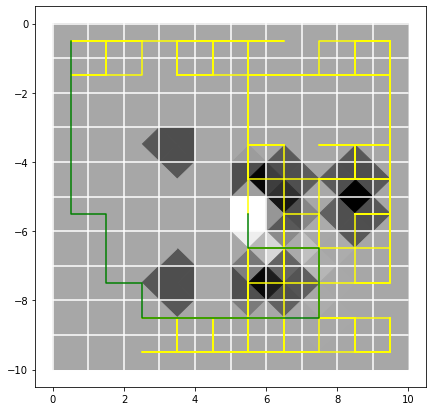

episode: 40 steps: 383 total_steps: 13604


<Figure size 432x288 with 0 Axes>

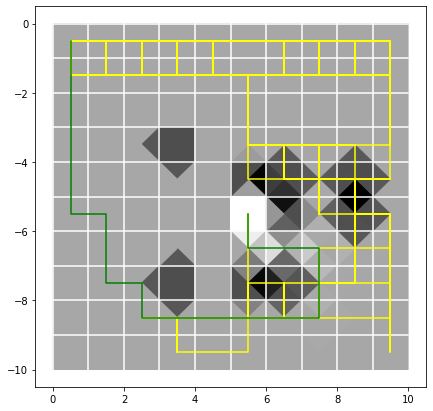

episode: 41 steps: 793 total_steps: 14397


<Figure size 432x288 with 0 Axes>

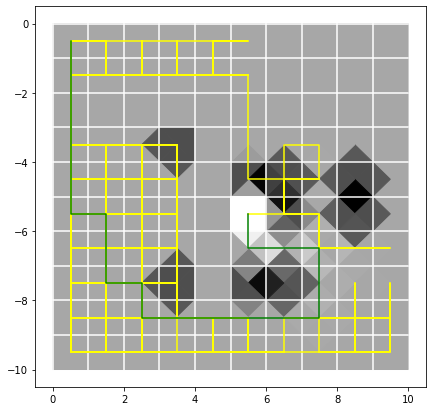

episode: 42 steps: 47 total_steps: 14444


<Figure size 432x288 with 0 Axes>

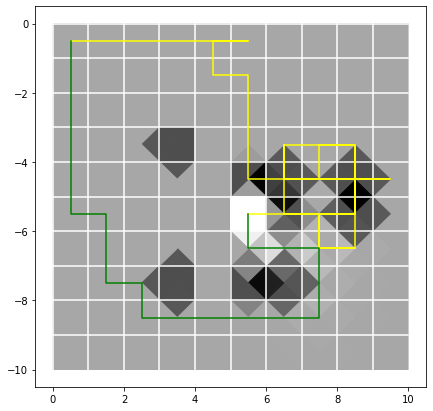

episode: 43 steps: 259 total_steps: 14703


<Figure size 432x288 with 0 Axes>

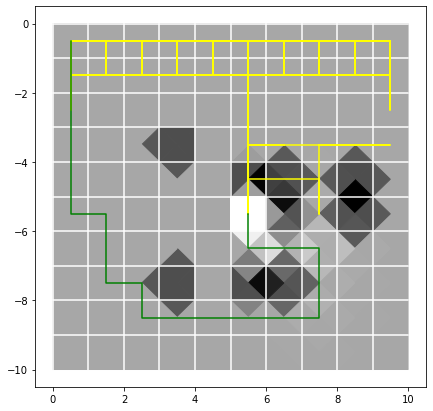

episode: 44 steps: 911 total_steps: 15614


<Figure size 432x288 with 0 Axes>

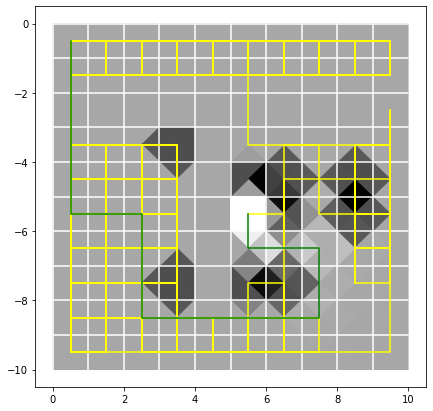

episode: 45 steps: 83 total_steps: 15697


<Figure size 432x288 with 0 Axes>

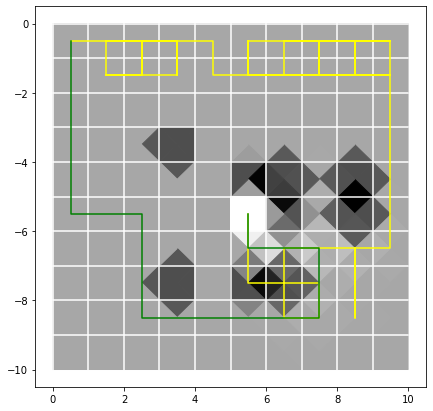

episode: 46 steps: 97 total_steps: 15794


<Figure size 432x288 with 0 Axes>

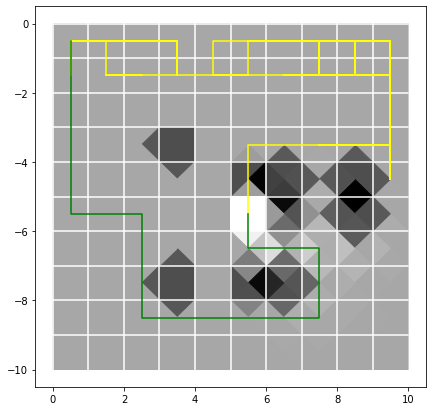

episode: 47 steps: 211 total_steps: 16005


<Figure size 432x288 with 0 Axes>

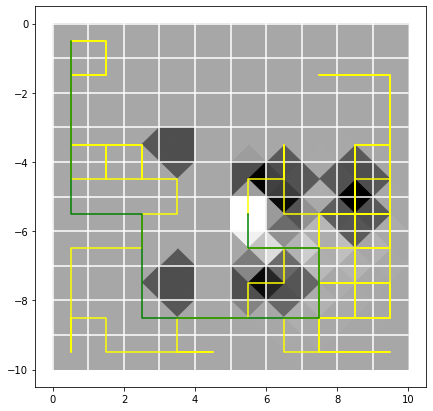

episode: 48 steps: 163 total_steps: 16168


<Figure size 432x288 with 0 Axes>

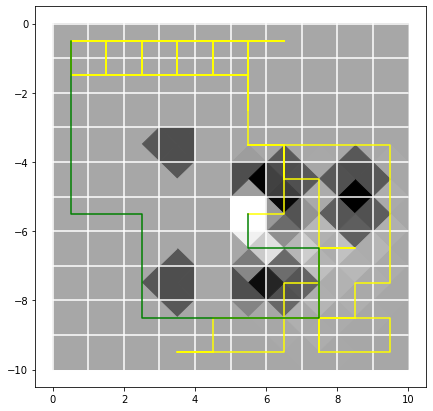

episode: 49 steps: 785 total_steps: 16953


<Figure size 432x288 with 0 Axes>

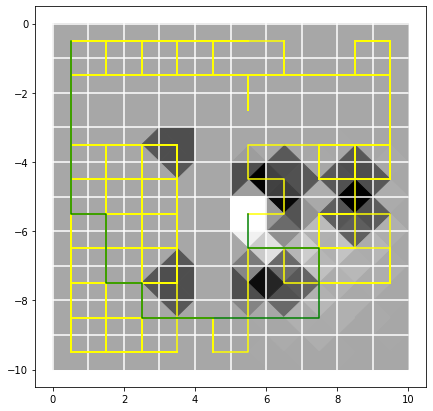

episode: 50 steps: 873 total_steps: 17826


<Figure size 432x288 with 0 Axes>

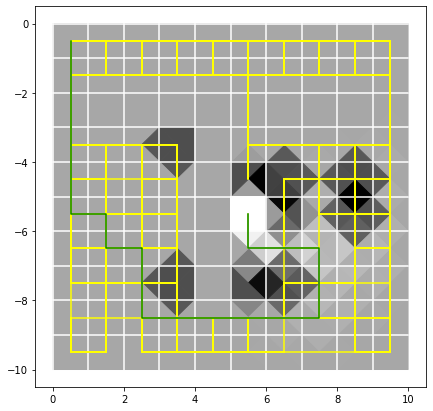

episode: 51 steps: 343 total_steps: 18169


<Figure size 432x288 with 0 Axes>

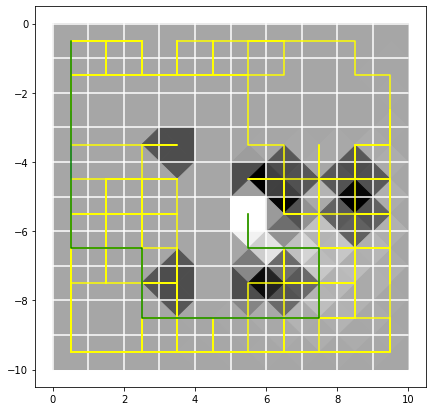

episode: 52 steps: 127 total_steps: 18296


<Figure size 432x288 with 0 Axes>

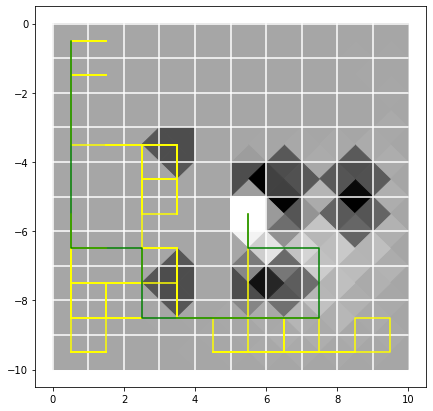

episode: 53 steps: 1000 total_steps: 19296


<Figure size 432x288 with 0 Axes>

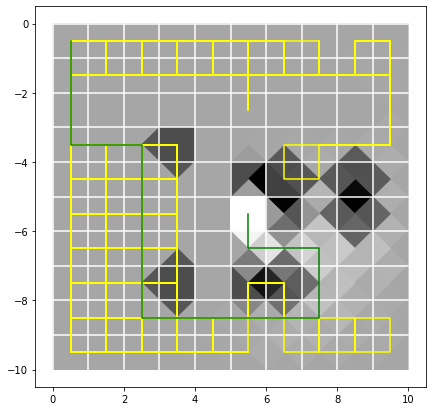

episode: 54 steps: 787 total_steps: 20083


<Figure size 432x288 with 0 Axes>

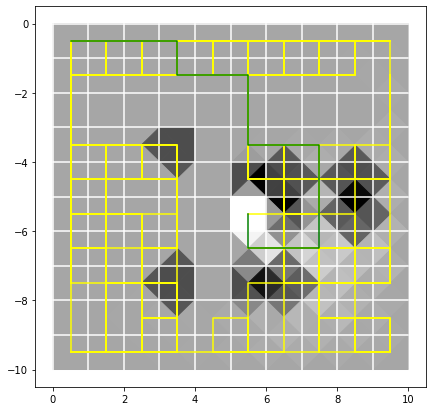

episode: 55 steps: 143 total_steps: 20226


<Figure size 432x288 with 0 Axes>

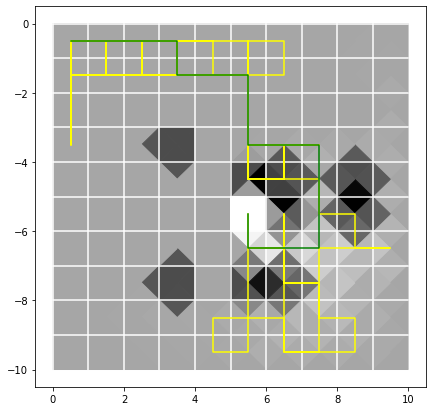

episode: 56 steps: 239 total_steps: 20465


<Figure size 432x288 with 0 Axes>

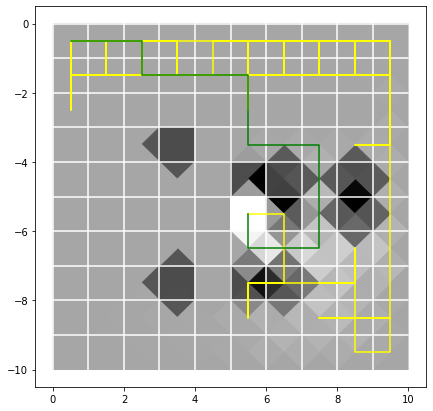

episode: 57 steps: 107 total_steps: 20572


<Figure size 432x288 with 0 Axes>

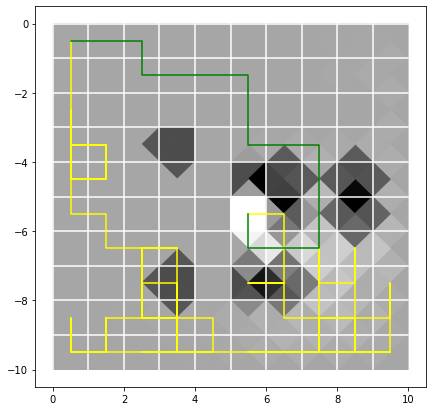

episode: 58 steps: 443 total_steps: 21015


<Figure size 432x288 with 0 Axes>

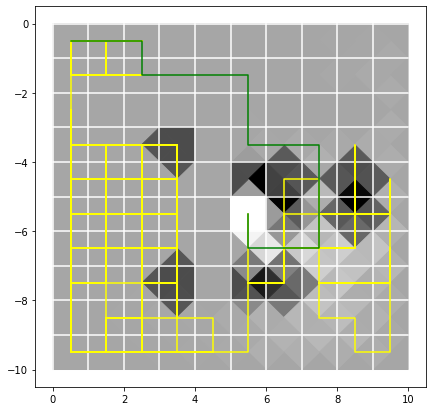

episode: 59 steps: 723 total_steps: 21738


<Figure size 432x288 with 0 Axes>

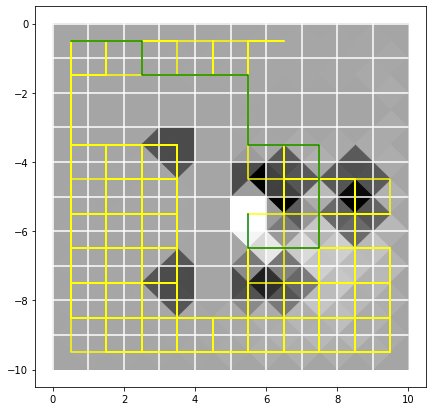

In [18]:
import time

# เลือกวิธีการเดิน
learning_alg = ['random_pick', 'random_walk', 'epsilon_greedy']
#choice = 1
choice = 1 # ลองเปลี่ยนดูหลาย ๆ แบบ
print('การเดินแบบ: {}'.format(learning_alg[choice]))

# เราจะทำการทดลองเล่นหลาย ๆ รอบ แต่ละรอบเราก็จะทำการเดินแบบสุ่ม (ขึ้นอยู่กับฟังก์ชันที่เลือก)
for episode in range(episode, episode + 30):
  
  plt.figure()
  # plot ตาราง q-value
  plot_q()

  # เริ่มต้นการเรียน!
  steps = 0 # เอาไว้นับจำนวนก้าวในรอบนี้
  
  if learning_alg[choice] == 'random_pick':
    # เดินแบบสุ่มตำแหน่งไปเลย
    trace = train_random_pick(steps=50)
    trace = np.array([ij(s) for s in trace])
    plt.scatter(trace[:, 1] + 0.5, -trace[:, 0] - 0.5, 
                color='yellow', s=20, alpha=1.0, zorder=2)
  elif learning_alg[choice] == 'random_walk':
    # เดินแบบสุ่มเริ่มจาก 0,0
    trace = train_random_walk(max_steps=1000)    
    trace = np.array([ij(s) for s in trace])
    plt.plot(trace[:, 1] + 0.5, -trace[:, 0] - 0.5, color='yellow', zorder=2)
  elif learning_alg[choice] == 'epsilon_greedy':
    # เดินแบบสุ่มปน greedy เริ่มจาก 0,0
    trace = train_epsilon_greedy(max_steps=1000, epsilon=0.9)
    trace = np.array([ij(s) for s in trace])
    plt.plot(trace[:, 1] + 0.5, -trace[:, 0] - 0.5, color='yellow', zorder=2)

  steps += len(trace)
  total_steps += steps
  print('episode: {} steps: {} total_steps: {}'.format(episode, steps, total_steps))

  # เดินอย่างดีที่สุด (greedy) โดยไล่ตามเส้นทางที่จะให้ค่า Q สูงที่สุด
  walk = []
  s = 0
  for i in range(M * N):
      walk.append(s)
      actions = get_actions(s)
      if len(actions) == 0: 
          # หากถึงตำแหน่งสุดท้ายแล้วก็หยุดเดิน
          break
      candidate_s = [act[1] for act in actions]
      # เลือก state ต่อไปที่ที่ดีที่สุดจาก q-value ที่สูงที่สุด
      best_s = candidate_s[np.argmax(Q[candidate_s].max(axis=1))]
      s = best_s

  walk = np.array([ij(s) for s in walk])

  # เส้นสีเขียว คือ การเดินแบบดีที่สุด ณ ตอนนี้
  plt.plot(walk[:, 1] + 0.5, -walk[:, 0] - 0.5, color='green')
  plt.show()
  
  time.sleep(1)